In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datosporregion as dpr
from model import SEIRDmodel
import matplotlib.colors as colors

In [2]:
viajes = dpr.viajes_regiones()
casos = dpr.casos_regiones()
modelo = SEIRDmodel(viajes, casos)

In [114]:
y = modelo.simular(reduccionTrafico=0.5)

In [115]:
dias = len(y[0])
dias

100

In [116]:
inf = y[[5*i + 2 for i in range(8)]]

In [117]:
df = {}
for i in range(14):
    week = 'semana_{}'.format(i+1)
    df[week] = inf[:, i*7]
    
df['region'] = [i+1 for i in range(8)]

df = pd.DataFrame(df)
    

In [118]:
import geopandas as gpd

In [119]:
map_df = gpd.read_file('regiones.shp', encoding = 'latin')

In [120]:
merged = map_df.set_index('region').join(df.set_index('region'))

In [121]:
merged[['semana_{}'.format(i) for i in range(1, 15)]]

,semana_1,semana_2,semana_3,semana_4,semana_5,semana_6,semana_7,semana_8,semana_9,semana_10,semana_11,semana_12,semana_13,semana_14
region,,,,,,,,,,,,,,
1,0.0,0.004196,0.019041,0.055757,0.161726,0.542686,2.115568,9.062464,40.614915,185.258721,844.054473,3712.496066,14189.668544,39266.483543
2,1.0,0.801879,0.861534,1.223331,2.052487,3.766588,7.502944,16.993879,46.683546,158.159297,623.673203,2617.443666,10435.332573,34086.573226
3,0.0,0.003839,0.018149,0.050613,0.122394,0.304666,0.874688,3.021153,12.071727,52.310307,233.859981,1031.488175,4104.203226,12668.296849
4,1.0,0.774084,0.713598,0.780215,0.994777,1.536422,3.230166,9.819110,38.458458,168.045040,757.469273,3352.394947,13301.085168,40563.614980
5,0.0,0.001152,0.006221,0.021273,0.070572,0.260765,1.072299,4.707905,21.320158,97.689433,446.492584,1978.237082,7757.310661,22866.563141
6,1.0,0.737573,0.570316,0.457507,0.382005,0.342076,0.360782,0.547297,1.382532,5.026628,21.207137,91.719433,362.176178,1115.821510
7,0.0,0.007197,0.066462,0.379533,1.888671,8.974161,41.800106,193.583356,895.026833,4125.690779,18734.275220,79777.182693,272265.226206,586740.799913
8,0.0,0.002787,0.013263,0.037034,0.089181,0.219946,0.624451,2.138442,8.506669,36.795681,164.372024,724.264295,2872.694317,8805.684510


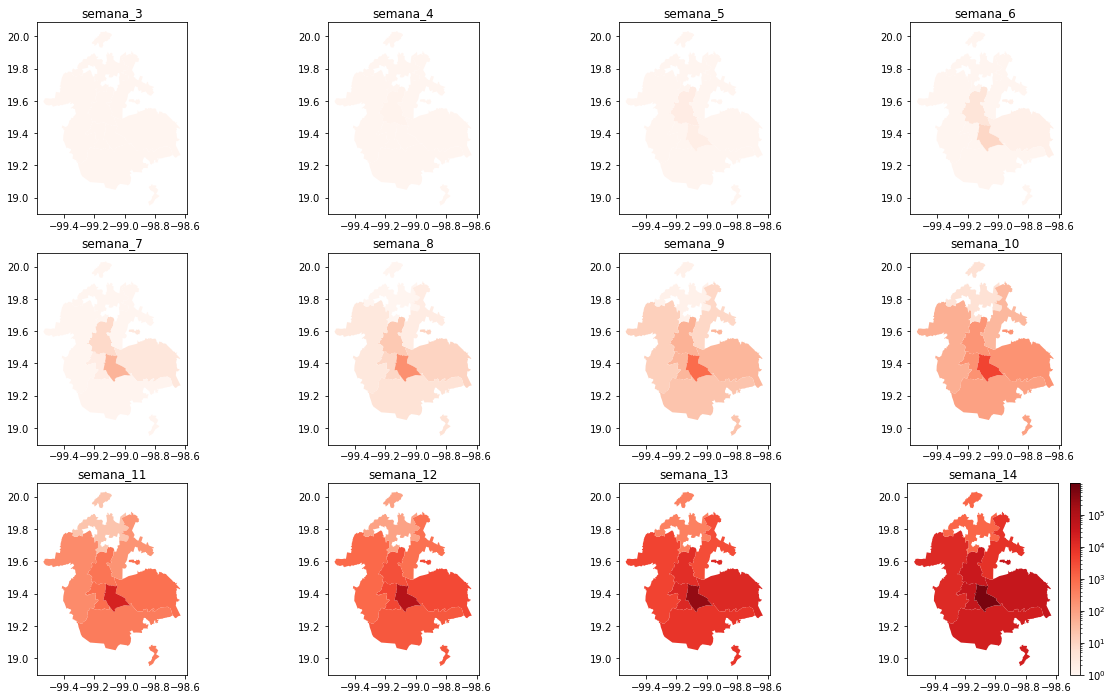

In [122]:
fig, ax = plt.subplots(3, 4)
vmax = 990000
vmin = 0

semana = 3
for i in range(3):
    for j in range(4):
        s = 'semana_{}'.format(semana)
        semana += 1
        merged.plot(s, ax = ax[i, j], cmap = 'Reds', norm=colors.LogNorm(vmin=vmin+1, vmax=vmax))
        ax[i, j].set_title(s)


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=colors.LogNorm(vmin=vmin+1, vmax=vmax))

cbar = fig.colorbar(sm)

fig.set_size_inches(20, 12)
plt.show()